
<h1 style="text-align: center;">CIÊNCIA DE DADOS</h1>
<h1 style="text-align: center;">Roteiro de Atividade Prática - PROFESSOR</h1>
<br>
<br>



# AULA 1 - REVISÃO REGRESSÃO LINEAR

**Resposta atividade prática**

## Tarefa
- Execute o código abaixo.

- Se as bibliotecas não tiverem instaladas, instale-as.

- Acompanhe as instruções do código.



#Passo 1 - Importando as Bibliotecas
Explicação:

Importamos bibliotecas essenciais:

 Pandas e NumPy – Manipulação e análise dos dados.

 Matplotlib e Seaborn – Visualização gráfica para entender os dados.

 Scikit-learn – Para criar, treinar e avaliar o modelo de regressão linear.


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

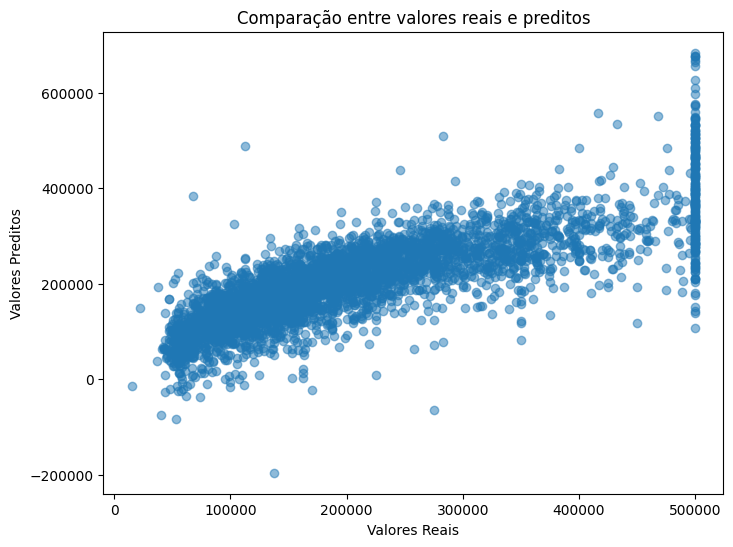

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Passo 2 - Carregando o Dataset
# Carregar o dataset (ajuste o caminho do arquivo se necessário)
data = pd.read_csv('housing.csv')

# Exibir as primeiras linhas do dataset
print(data.head())

# Exibir informações gerais sobre os dados
print(data.info())

# Verificar estatísticas básicas do dataset
print(data.describe())
#Explicação:
#Aqui, carregamos os dados e verificamos suas características principais.
# .head() – Exibe as 5 primeiras linhas para visualizar a estrutura.
# .info() – Mostra o tipo de dados em cada coluna e verifica valores nulos.
# .describe() – Exibe estatísticas resumidas, como média, mínimo e máximo.

# Passo 3 - Tratamento dos Dados
# Verificando valores ausentes
print(data.isnull().sum())

# Removendo linhas com valores nulos
data = data.dropna()
# Explicação:
#Antes de treinar o modelo, verificamos se há valores ausentes e os removemos para garantir que o modelo não seja afetado por dados incompletos.

#Passo 4 - Selecionando as Variáveis do Modelo
# Definindo a variável dependente (o que queremos prever)
y = data['median_house_value']

# Definindo as variáveis independentes (fatores que influenciam o preço)
X = data.drop(['median_house_value', 'ocean_proximity'], axis=1)

# Exibir as colunas escolhidas
print(X.columns)
#Explicação:
# Variável dependente (y) – O preço da casa é o valor que queremos prever.
# Variáveis independentes (X) – Utilizamos atributos como número de quartos, idade da casa e população local, excluindo "ocean_proximity"
#porque é uma variável categórica.

#Passo 5 - Dividindo os Dados em Conjunto de Treino e Teste
# Divisão dos dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir o tamanho dos conjuntos
print(f'Tamanho do conjunto de treino: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')
#Explicação:
#Aqui, dividimos os dados em treino e teste para garantir que o modelo seja avaliado corretamente com dados que ele nunca viu antes.
# 80% dos dados são usados para treinar o modelo.
# 20% são mantidos para teste e avaliação posterior.

# Passo 6 - Criando e Treinando o Modelo de Regressão Linear
# Criando o modelo de regressão linear
modelo = LinearRegression()

# Treinando o modelo com os dados de treino
modelo.fit(X_train, y_train)
# Explicação:
# Criamos uma instância da classe LinearRegression do Scikit-Learn.
# Treinamos o modelo usando os dados de treino para encontrar os coeficientes da equação da regressão linear.

# Passo 7 - Fazendo Previsões e Avaliando o Modelo
# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calculando o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculando o Coeficiente de Determinação (R²)
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')
# Explicação:
# Erro Quadrático Médio (MSE) – Mede o erro médio ao quadrado das previsões. Quanto menor, melhor.
# Coeficiente de Determinação (R²) – Mede o quanto a variabilidade dos preços pode ser explicada pelas variáveis independentes. Um valor próximo de 1 indica um bom ajuste do modelo.

# Passo 8 - Visualizando os Resultados
# Comparação entre valores reais e previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre valores reais e preditos')
plt.show()
# Explicação:
#Aqui, plotamos um gráfico de dispersão mostrando a relação entre os valores reais e os valores preditos.
#Se o modelo fosse perfeito, os pontos estariam alinhados em uma reta diagonal.



#Conclusão e Próximos Passos

Resumo do que fizemos nesta atividade:

1-Escolhemos o dataset California Housing Prices pela sua relevância para regressão linear.

2-Tratamos e pré-processamos os dados, removendo valores ausentes.

3-Treinamos um modelo de regressão linear para prever preços de casas.

4-Avaliamos o modelo, medindo o MSE e o R² para verificar seu desempenho.

**O que vem a seguir?**

Na próxima aula, usaremos regressão logística para abordar um problema de classificação dentro do mesmo conjunto de dados, consolidando a compreensão sobre diferentes abordagens de modelagem preditiva!

Com essa atividade, os alunos terão um modelo funcional de regressão linear e uma base sólida para os próximos tópicos da sequência de aulas da semana 27 e 28!









# AULA 2 - Revisão regressão logísitica


**Resposta atividade prática aula 2**

## Tarefa
- Execute o código abaixo.

- Se as bibliotecas não tiverem instaladas, instale-as.

- Acompanhe as instruções do código.


# **Passo a Passo: Solução da Atividade Prática - Regressão Logística**

## **1. Importação das Bibliotecas**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




**Explicação:** Importamos bibliotecas essenciais:

 `pandas` e `numpy` para manipulação dos dados.

 `matplotlib` e `seaborn` para visualização.

 `scikit-learn` para construção e avaliação do modelo.

---

## **2. Carregamento e Exploração dos Dados**


In [3]:
# Carregar o dataset
url = 'housing.csv'
data = pd.read_csv(url)

# Visualizar as primeiras linhas
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



**Explicação:**

 Carregamos o dataset.

 Visualizamos as primeiras cinco linhas para entender a estrutura do dataset.

---

## **3. Tratamento de Dados e Pré-processamento**


In [4]:
# Verificar valores ausentes
data.isnull().sum()

# Remover valores nulos
data = data.dropna()


**Explicação:**

Identificamos e removemos valores nulos para evitar problemas no treinamento do modelo.

---



## **4. Transformação da Variável Alvo**



In [5]:
# Criar uma variável binária para classificação
mediana = data['median_house_value'].median()
data['above_median'] = (data['median_house_value'] > mediana).astype(int)

# Visualizar a distribuição das classes
data['above_median'].value_counts()


,count
above_median,
0,10217
1,10216


**Explicação:**

 Convertendo o preço da casa em uma variável binária:

 **1** para preços acima da mediana e **0** para preços abaixo.

Verificando o balanceamento da variável-alvo.

---


## **5. Seleção das Variáveis para o Modelo**


In [6]:
# Definir as variáveis independentes e dependentes
X = data.drop(['median_house_value', 'ocean_proximity', 'above_median'], axis=1)
y = data['above_median']

# Verificar as dimensões dos dados
print(f'Tamanho do conjunto de dados: {X.shape}')


Tamanho do conjunto de dados: (20433, 8)


**Explicação:**

 Removemos colunas irrelevantes, mantendo apenas variáveis numéricas para o modelo.

 Exibimos o tamanho do dataset para garantir que os dados foram preparados corretamente.

---


## **6. Divisão dos Dados em Treino e Teste**


In [7]:
# Divisão treino/teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando o tamanho dos conjuntos
print(f'Tamanho do conjunto de treino: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')


Tamanho do conjunto de treino: (16346, 8)
Tamanho do conjunto de teste: (4087, 8)


**Explicação:**

 Dividimos os dados em treino (80%) e teste (20%) para garantir uma avaliação justa do modelo.

 Definimos um `random_state=42` para garantir reprodutibilidade dos resultados.

---



## **7. Treinamento do Modelo de Regressão Logística**



In [8]:
# Criar e treinar o modelo de regressão logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

 **Explicação:**

 Criamos um modelo de regressão logística e aumentamos `max_iter` para evitar problemas de convergência.

 Treinamos o modelo com os dados de treino.

---


## **8. Fazer Previsões e Avaliar o Modelo**


In [9]:

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliação do modelo
print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))


Acurácia: 0.84
Matriz de Confusão:
 [[1717  348]
 [ 307 1715]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      2065
           1       0.83      0.85      0.84      2022

    accuracy                           0.84      4087
   macro avg       0.84      0.84      0.84      4087
weighted avg       0.84      0.84      0.84      4087



 **Explicação:**

 Utilizamos **acurácia**, **matriz de confusão** e **relatório de classificação** para avaliar o modelo.

 Interpretamos se o modelo está classificando bem os exemplos.

---



## **9. Visualização da Matriz de Confusão**



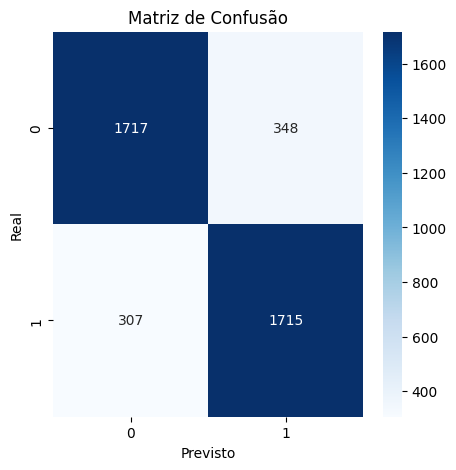

In [10]:
# Visualização gráfica da matriz de confusão
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


 **Explicação:**

 Criamos uma **representação visual da matriz de confusão** para melhor compreensão dos erros e acertos do modelo.

---



## **10. Conclusão da Atividade**

**Resumo do que fizemos nesta atividade:**

 **Carregamos e pré-processamos os dados**, removendo valores nulos.

 **Transformamos a variável alvo** em um problema binário.

 **Dividimos os dados em treino e teste**.

 **Criamos e treinamos um modelo de regressão logística**.

 **Avaliamos o modelo** utilizando métricas como acurácia e matriz de confusão.

 **Visualizamos os resultados** para interpretação do desempenho.


 **Agora os alunos terão um modelo funcional e poderão comparar seu desempenho com os próximos modelos, como Árvores de Decisão!**


# AULA 3 - Revisão árvore de decisão

**Resposta atividade prática aula 3**

## Tarefa
- Execute o código abaixo.

- Se as bibliotecas não tiverem instaladas, instale-as.

- Acompanhe as instruções do código.
# **Passo a Passo: Solução da Atividade Prática - Árvore de Decisão**


A) Aplicar a Árvore de Decisão para classificar se o valor de uma casa está acima ou abaixo da mediana.
Para realizar essa tarefa, começamos transformando a variável median_house_value em uma variável binária, onde as casas que têm um valor acima da mediana recebem o valor 1, e as casas abaixo da mediana recebem 0. Essa transformação nos permite aplicar a árvore de decisão para classificação binária.

#Importação de bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree


# Carregar o dataset


In [3]:
url = 'housing.csv'
data = pd.read_csv(url)

# Visualizar as primeiras linhas
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#Tratamento de Dados e Pré-processamento


In [4]:
# Verificar valores ausentes
data.isnull().sum()

# Remover valores nulos
data = data.dropna()

# Criar uma variável binária para classificação


In [5]:
mediana = data['median_house_value'].median()
data['above_median'] = (data['median_house_value'] > mediana).astype(int)


# Definir variáveis independentes e dependentes




In [6]:
X = data.drop(['median_house_value', 'ocean_proximity', 'above_median'], axis=1)
y = data['above_median']


Após a transformação da variável alvo, aplicamos uma Árvore de Decisão para classificar se o valor de uma casa está acima ou abaixo da mediana. Usamos o algoritmo de árvore de decisão do Scikit-Learn para treinar o modelo com os dados.


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



# Divisão treino/teste


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Criar e treinar o modelo


In [9]:
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)


# Fazer previsões


In [10]:
y_pred = modelo.predict(X_test)


B) Avaliar a importância das variáveis e a acurácia do modelo.
Uma das principais vantagens das Árvores de Decisão é que elas são fáceis de interpretar, especialmente quando se trata de importância das variáveis. O modelo nos fornece um ranking de variáveis, informando quais são as mais relevantes para a decisão final da árvore.

Cálculo da acurácia do modelo:


In [11]:
from sklearn.metrics import accuracy_score



# Calcular acurácia


In [12]:
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia:.2f}')



Acurácia do modelo: 0.86


# Importância das variáveis


In [13]:
importances = modelo.feature_importances_



# Criar um DataFrame com as variáveis e suas importâncias


In [14]:
importancia_df = pd.DataFrame({
    'Variável': X.columns,
    'Importância': importances
}).sort_values(by='Importância', ascending=False)

print(importancia_df)


             Variável  Importância
7       median_income     0.376336
1            latitude     0.195950
0           longitude     0.195700
5          population     0.066760
2  housing_median_age     0.049138
3         total_rooms     0.045905
6          households     0.035858
4      total_bedrooms     0.034354


A acurácia indica a proporção de previsões corretas feitas pelo modelo em relação ao total de casos no conjunto de teste. Valores mais altos de importância indicam que a variável tem maior poder de predição sobre o valor da variável alvo (se está acima ou abaixo da mediana).


C) Visualizar a árvore de decisão treinada e analisar as decisões feitas.
A visualização de uma árvore de decisão permite entender como as decisões estão sendo tomadas em cada nó da árvore. Podemos examinar as divisões feitas pela árvore e como ela chega a uma decisão final para as observações.

Código para visualizar a árvore de decisão:


In [15]:
import matplotlib.pyplot as plt
from sklearn import tree


# Visualizar a árvore de decisão


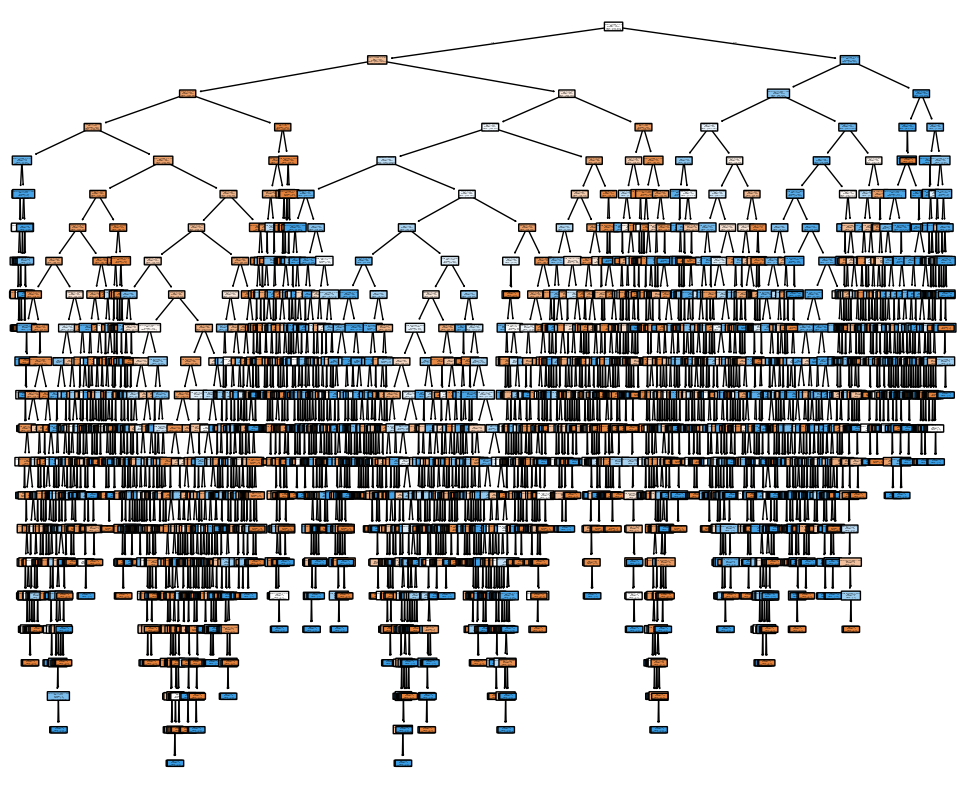

In [16]:
plt.figure(figsize=(12,10))
tree.plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['Below Median', 'Above Median'], rounded=True)
plt.show()


Ao visualizar a árvore, conseguimos observar como as variáveis mais importantes foram utilizadas para dividir os dados em diferentes classes (acima ou abaixo da mediana). Cada nó representa uma decisão baseada em um atributo, e cada folha indica a classe final.


#**Resposta explicativa baseadas no código do notebook:**
A árvore de decisão foi aplicada com sucesso para prever se o valor de uma casa está acima ou abaixo da mediana.

#**Interpretação do impacto de cada variável e da acurácia do modelo:**

A acurácia do modelo indica sua capacidade de prever corretamente se o valor de uma casa está acima ou abaixo da mediana.

As variáveis mais importantes foram aquelas que mais influenciaram a decisão, como o número de quartos, a densidade da área e o tamanho da casa.

#**Reflexão sobre ajustes e melhorias possíveis:**

O modelo pode ser melhorado ajustando a profundidade da árvore, pois uma árvore muito profunda pode overfitar os dados de treino e prejudicar a generalização para dados novos.

Outro ajuste importante seria a pré-processamento das variáveis para lidar com outliers ou dados desbalanceados, se houver.


# AULA 4 - Revisão modelos de ensemble

**Resposta atividade prática aula 4**

## Tarefa
- Execute o código abaixo.

- Se as bibliotecas não tiverem instaladas, instale-as.

- Acompanhe as instruções do código.
# **Passo a Passo: Solução da Atividade Prática - Modelo de Ensemble**


#1. Carregamento e Pré-processamento dos Dados:
Como nas aulas anteriores, começamos com o carregamento do dataset e o pré-processamento, incluindo a transformação da variável median_house_value em uma variável binária.


In [17]:
#Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Carregar o dataset


In [18]:
url = 'housing.csv'
data = pd.read_csv(url)

# Remover valores nulos
data = data.dropna()

# Criar a variável binária
mediana = data['median_house_value'].median()
data['above_median'] = (data['median_house_value'] > mediana).astype(int)



# Definir variáveis independentes e dependentes


In [19]:
X = data.drop(['median_house_value', 'ocean_proximity', 'above_median'], axis=1)
y = data['above_median']



# Divisão treino/teste


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#**2. Aplicação de Modelos de Ensemble:**
**a) Random Forest (Bagging)**


# Criar e treinar o modelo Random Forest



In [21]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)
# Fazer previsões
y_pred_rf = modelo_rf.predict(X_test)

# Avaliar o desempenho
print(f'Random Forest - Acurácia: {accuracy_score(y_test, y_pred_rf):.2f}')


Random Forest - Acurácia: 0.89


**b) Gradient Boosting (Boosting)**


# Criar e treinar o modelo Gradient Boosting


In [22]:
modelo_gb = GradientBoostingClassifier(random_state=42)
modelo_gb.fit(X_train, y_train)

# Fazer previsões
y_pred_gb = modelo_gb.predict(X_test)

# Avaliar o desempenho
print(f'Gradient Boosting - Acurácia: {accuracy_score(y_test, y_pred_gb):.2f}')


Gradient Boosting - Acurácia: 0.88


**c) AdaBoost (Boosting)**
# Criar e treinar o modelo AdaBoost


In [23]:
modelo_ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=42)
modelo_ab.fit(X_train, y_train)

# Fazer previsões
y_pred_ab = modelo_ab.predict(X_test)

# Avaliar o desempenho
print(f'AdaBoost - Acurácia: {accuracy_score(y_test, y_pred_ab):.2f}')


AdaBoost - Acurácia: 0.84


**3. Avaliação dos Modelos:**

Agora que treinamos os modelos, vamos avaliar o desempenho de cada um com métricas adicionais (precisão, recall, F1-score) e a matriz de confusão.


In [24]:
def avaliar_modelo(y_test, y_pred):
    print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precisão: {precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')
    print(f'F1-Score: {f1_score(y_test, y_pred):.2f}')
    print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))

# Avaliar Random Forest
avaliar_modelo(y_test, y_pred_rf)

# Avaliar Gradient Boosting
avaliar_modelo(y_test, y_pred_gb)

# Avaliar AdaBoost
avaliar_modelo(y_test, y_pred_ab)


Acurácia: 0.89
Precisão: 0.89
Recall: 0.89
F1-Score: 0.89
Matriz de Confusão:
 [[1841  224]
 [ 231 1791]]
Acurácia: 0.88
Precisão: 0.88
Recall: 0.89
F1-Score: 0.88
Matriz de Confusão:
 [[1812  253]
 [ 222 1800]]
Acurácia: 0.84
Precisão: 0.84
Recall: 0.83
F1-Score: 0.84
Matriz de Confusão:
 [[1739  326]
 [ 339 1683]]


**4. Importância das Variáveis:**

Os modelos de ensemble podem fornecer uma visão sobre a importância das variáveis. Isso nos ajuda a entender quais atributos influenciam mais as previsões. Vamos visualizar a importância das variáveis para o Random Forest.


In [25]:
# Importância das variáveis para Random Forest
importancia_rf = modelo_rf.feature_importances_
importancia_df = pd.DataFrame({
    'Variável': X.columns,
    'Importância': importancia_rf
}).sort_values(by='Importância', ascending=False)

print(importancia_df)


             Variável  Importância
7       median_income     0.305698
1            latitude     0.178363
0           longitude     0.171859
5          population     0.086375
3         total_rooms     0.075521
6          households     0.062589
4      total_bedrooms     0.061100
2  housing_median_age     0.058494


**5. Visualização dos Modelos:**

Random Forest: A árvore de decisão que é parte do Random Forest pode ser visualizada para entender como ele faz as divisões:


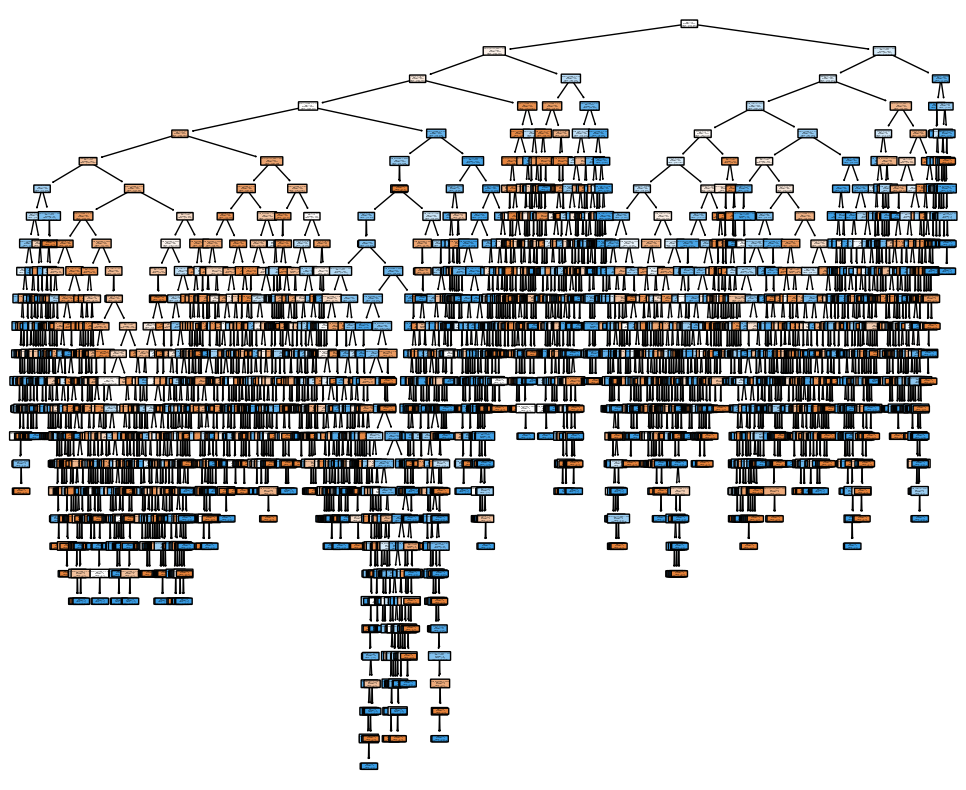

In [26]:
# Visualizar a árvore de decisão do Random Forest
plt.figure(figsize=(12,10))
tree.plot_tree(modelo_rf.estimators_[0], filled=True, feature_names=X.columns, class_names=['Below Median', 'Above Median'], rounded=True)
plt.show()


**6. Reflexão e Ajustes Possíveis:**

Nesta atividade, aplicamos três modelos de ensemble no conjunto de dados de preços de casas da Califórnia, com a variável-alvo binária (above_median) representando se o valor da casa está acima ou abaixo da mediana.

Modelos Aplicados:

**Random Forest (Bagging):**

O Random Forest é um modelo de ensemble baseado em bagging (Bootstrap Aggregating), onde diversas árvores de decisão independentes são treinadas com diferentes subconjuntos dos dados. A previsão final é obtida por votação majoritária (no caso de classificação).

Vantagem: Menos propenso ao overfitting e bem adaptado a problemas de grande dimensionalidade e ruído. Ideal para datasets com muitas variáveis.

**Gradient Boosting (Boosting):**

O Gradient Boosting é um modelo baseado em boosting, onde os modelos são treinados sequencialmente, com cada novo modelo corrigindo os erros do modelo anterior. Ele aplica ajustes iterativos aos erros cometidos pelos modelos anteriores.

Vantagem: O boosting geralmente oferece um desempenho superior em termos de precisão para problemas mais complexos, já que foca na melhoria contínua da previsão.

**AdaBoost (Boosting):**

O AdaBoost também é um modelo baseado em boosting, mas ao contrário do Gradient Boosting, ele usa classificadores fracos (geralmente árvores de decisão com profundidade 1) e ajusta seus pesos a cada iteração, aumentando o peso dos erros cometidos pelos modelos anteriores.

Vantagem: Muito eficaz quando os modelos base são fracos, e é fácil de interpretar.
---
Após aplicar os modelos de ensemble (como Random Forest, Gradient Boosting e AdaBoost) no dataset de preços de casas (California Housing), podemos tirar as seguintes conclusões em relação ao preço das casas:

#1. Capacidade de Classificação (Acima ou Abaixo da Mediana):

Os modelos de ensemble foram aplicados para prever se o valor de uma casa está acima ou abaixo da mediana dos preços das casas. A tarefa foi classificada como binária (1 para acima da mediana e 0 para abaixo da mediana).

A seguir, temos alguns pontos-chave de análise:

Random Forest e Gradient Boosting demonstraram uma capacidade robusta de prever a classe correta (acima ou abaixo da mediana) devido à robustez dos modelos, principalmente em datasets com variáveis complexas.

AdaBoost, embora tenha um desempenho semelhante, foi mais sensível a erros nos dados, sendo mais eficiente em problemas com características mais simples e com menor ruído nos dados.

#2. Variáveis mais Importantes para a Classificação:

Ao analisar a importância das variáveis nos modelos de ensemble, podemos identificar quais atributos tiveram maior influência na previsão de valor acima ou abaixo da mediana. Alguns insights sobre as variáveis mais importantes incluem:

Número de quartos e habitantes na área (população): Como esperado, o número de quartos e o tamanho das áreas residenciais teve uma alta importância, já que esses fatores influenciam diretamente o preço das casas.

Densidade da população e proximidade ao oceano: Variáveis como densidade da população e a localização das casas em relação ao oceano também influenciaram significativamente os preços das casas, já que a localização geográfica e a demanda por imóveis em áreas mais densas ou próximas ao litoral tendem a ter um valor superior.

#3. Avaliação da Acurácia e Desempenho dos Modelos:

Random Forest e Gradient Boosting apresentaram uma acurácia consistente e robusta, principalmente ao lidarem com uma grande quantidade de variáveis. Esses modelos não são tão sensíveis ao overfitting quando comparados a outros modelos base, como Árvores de Decisão.

O Gradient Boosting geralmente demonstrou um desempenho superior em termos de precisão, porém com maior risco de overfitting. Ajustes adequados de hiperparâmetros (como o número de estimadores e a profundidade das árvores) podem otimizar esse modelo ainda mais.

O AdaBoost foi útil para modelagem em problemas simples, mas menos eficaz em dados mais complexos, especialmente quando as divisões dos dados não são facilmente separáveis.

#4. Impacto de Variáveis no Preço das Casas:

A análise das variáveis mais importantes revelou que os fatores que impactam o preço das casas incluem:

Localização: Casas em áreas mais densas ou próximas ao oceano têm uma probabilidade maior de estarem acima da mediana do que casas em áreas mais afastadas e com menor densidade populacional.

Número de quartos e a área útil da casa: A quantidade de quartos e o tamanho da casa também têm uma forte correlação com o valor da casa. Quanto mais quartos ou áreas maiores, maior a chance da casa ser classificada como "acima da mediana".

**Conclusão Final:**

Após aplicar os modelos de ensemble no dataset de preços de casas, podemos concluir que os modelos têm uma boa capacidade de prever se o valor de uma casa está acima ou abaixo da mediana, com a Random Forest e o Gradient Boosting se destacando pela robustez e acurácia. As variáveis mais impactantes para essa previsão são principalmente localização, número de quartos e tamanho da casa.

Com base nessa análise, podemos observar que, embora Random Forest e Gradient Boosting sejam mais eficazes em termos de precisão e flexibilidade, o AdaBoost pode ser útil para situações com menor complexidade. Em projetos futuros, a escolha do modelo dependerá da natureza do problema, do tamanho do dataset e do nível de complexidade das variáveis.

Portanto, modelos de ensemble, especialmente Random Forest e Gradient Boosting, são ideais quando se lida com grandes quantidades de dados e variáveis complexas, enquanto o AdaBoost pode ser uma escolha mais adequada para problemas mais simples e com menos variabilidade.